In [17]:
#1 Load Historical Data 
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [18]:
#2 Data Retrieval and Feature Engineering
# 1. Download historical data (last 5 years)
ticker = "TSLA"
data = yf.download(ticker, start="2020-01-01")

# 2. Create the target variable: Yesterday's features predict Today's Close
# We shift the 'Close' price back by 1 to align today's features with tomorrow's price
data['Target_Close'] = data['Close'].shift(-1)

# 3. Select features and drop the last row (which has no target)
features = ['Open', 'High', 'Low', 'Close', 'Volume']
df = data[features + ['Target_Close']].dropna()

X = df[features]
y = df['Target_Close']

[*********************100%***********************]  1 of 1 completed


In [19]:
#3 Train-Test Split and Modeling
# Split data: 80% training, 20% testing
split = int(0.8 * len(df))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Initialize and train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

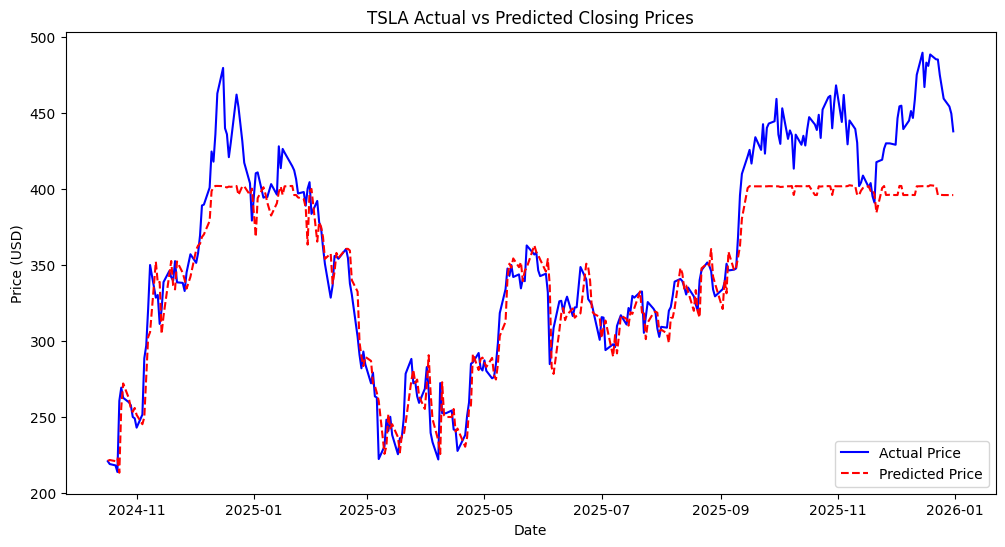

Root Mean Squared Error: $28.25


In [21]:
#6 Plot actual vs Predicted Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label="Actual Price", color='blue')
plt.plot(y_test.index, predictions, label="Predicted Price", color='red', linestyle='--')
plt.title(f"{ticker} Actual vs Predicted Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Calculate Error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error: ${rmse:.2f}")